In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import datetime as dt
import plotly.express as px
import sys

In [3]:
# Using SQLAlchemy
table = 'vw_Sales'
engine_cloud = create_engine('mssql+pyodbc://localhost\SQLEXPRESS/Product_Database?driver=SQL+Server+Native+Client+11.0')
df = pd.read_sql_table(table,engine_cloud.connect())
df

,Order_ID,Product,Quantity,Unit_Price,Revenue,Date,Time,Street Number,City,State,Zip Code
0,141234,iPhone,1,700.00,700.00,2019-01-22,21:25:00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28,14:15:00,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17,13:33:00,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05,20:33:00,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25,11:59:00,387 10th St,Austin,TX,73301
...,...,...,...,...,...,...,...,...,...,...,...
185634,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11,20:58:00,14 Madison St,San Francisco,CA,94016
185635,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01,12:01:00,549 Willow St,Los Angeles,CA,90001
185636,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09,06:43:00,273 Wilson St,Seattle,WA,98101
185637,319669,Wired Headphones,1,11.99,11.99,2019-12-03,10:39:00,778 River St,Dallas,TX,75001


In [4]:
df.isna().sum()             
df[df.duplicated() == True]

,Order_ID,Product,Quantity,Unit_Price,Revenue,Date,Time,Street Number,City,State,Zip Code


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185639 entries, 0 to 185638
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order_ID       185639 non-null  int64         
 1   Product        185639 non-null  object        
 2   Quantity       185639 non-null  int64         
 3   Unit_Price     185639 non-null  float64       
 4   Revenue        185639 non-null  float64       
 5   Date           185639 non-null  datetime64[ns]
 6   Time           185639 non-null  object        
 7   Street Number  185639 non-null  object        
 8   City           185639 non-null  object        
 9   State          185639 non-null  object        
 10  Zip Code       185639 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 15.6+ MB


In [6]:
df.describe()

,Order_ID,Quantity,Unit_Price,Revenue
count,185639.000000,185639.000000,185639.000000,185639.000000
mean,230409.453342,1.124387,184.564465,185.656438
std,51511.882910,0.442729,332.873834,333.062502
min,141234.000000,1.000000,2.990000,2.990000
25%,185828.500000,1.000000,11.950000,11.950000
50%,230354.000000,1.000000,14.950000,14.950000
75%,275026.500000,1.000000,150.000000,150.000000
max,319670.000000,9.000000,1700.000000,3400.000000


In [7]:
# df['Time'] = pd.to_timedelta(df['Time'],unit='hours')
df['Time'] = df['Time'].apply(lambda x: dt.time(int(x.split(':')[0]),int(x.split(':')[1]),int(x.split(':')[2])))

In [8]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Year'] = df['Date'].apply(lambda x: x.year)

In [9]:
Revenue_by_year = df.groupby(df['Year'])['Revenue'].sum()
Revenue_by_year

Year
2019    34456405.16
2020        8670.29
Name: Revenue, dtype: float64

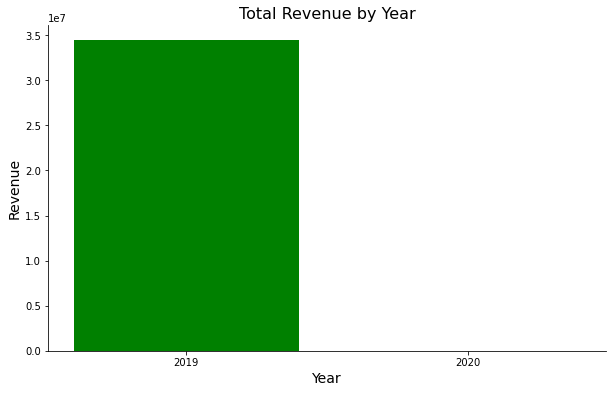

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(Revenue_by_year.index, Revenue_by_year.values, color='g')
# sns.countplot(x='Revenue',data=Revenue_by_year)
plt.title('Total Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(ticks=[2019,2020],labels=('2019','2020'), ha='center')
sns.despine(left=False, bottom=False)
plt.show()

In [12]:
Monthly_Sales = df.groupby(df['Month'])[['Quantity','Revenue']].sum().reset_index().sort_values('Month',ascending=True, ignore_index=True)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Monthly_Sales

,Month,Quantity,Revenue
0,1,10893,1821413.16
1,2,13425,2200012.30
2,3,16976,2804954.57
3,4,20532,3389203.47
4,5,18641,3150537.62
5,6,15232,2576265.21
6,7,16051,2646434.43
7,8,13418,2241042.83
8,9,13090,2094453.70
9,10,22661,3734714.66


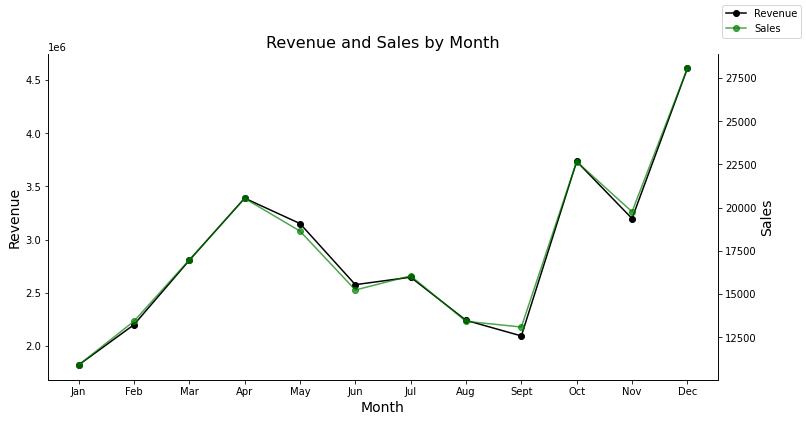

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(month, Monthly_Sales.Revenue,'o-k',label='Revenue')
ax2 = ax.twinx()
ax2.plot(month, Monthly_Sales.Quantity,'o-g', alpha=0.7, label='Sales')
ax.set_title('Revenue and Sales by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
ax2.set_ylabel('Sales', fontsize=14)
ax.set_xticks(ticks=range(12),labels=month, ha='center')
sns.despine(left=False, right=False, bottom=False)
fig.legend()
plt.show()

In [32]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
Sales_by_Hour = df.groupby(['Hour'])['Quantity'].sum()


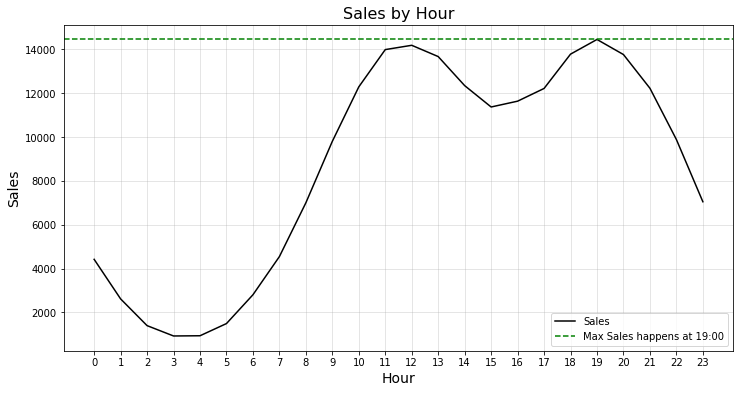

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Sales_by_Hour.index, Sales_by_Hour.values, '-k', label='Sales')
ax.set_title('Sales by Hour', fontsize=16)
ax.set_xlabel('Hour', fontsize=14)
ax.set_xticks(range(24), fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.grid('both', alpha=0.4)
ax.axhline(y=max(Sales_by_Hour.values), ls= '--', color='g', label=f'Max Sales happens at {Sales_by_Hour.tolist().index(Sales_by_Hour.max())}:00')
plt.legend()
plt.show()

In [14]:
Sales_by_City = df.groupby(df['City'])[['Quantity','Revenue']].sum().reset_index().sort_values('Quantity',ascending=False, ignore_index=True)

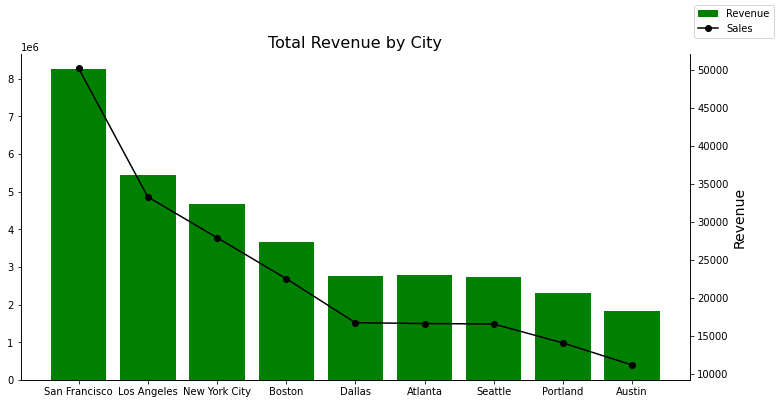

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(Sales_by_City.City, Sales_by_City.Revenue, color='g',label='Revenue')
ax2 = ax.twinx()
ax2.plot(Sales_by_City.City, Sales_by_City.Quantity, 'o-k', label='Sales', scaley=True)
plt.title('Total Revenue by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
# plt.xticks(Sales_by_City.City, ha='center')
sns.despine(left=False, right=False, bottom=False)
fig.legend()
plt.show()


In [16]:
Sales_by_State = df.groupby(df['State'])[['Quantity','Revenue']].sum().reset_index().sort_values('Revenue',ascending=True, ignore_index=True)
Sales_by_State

,State,Quantity,Revenue
0,ME,2745,449309.39
1,OR,11285,1869967.85
2,WA,16526,2745020.40
3,GA,16582,2794180.28
4,MA,22486,3658576.41
5,TX,27831,4583326.03
6,NY,27889,4661785.60
7,CA,83386,13702909.49


In [17]:
fig = px.choropleth(Sales_by_State, locations='State', locationmode="USA-states", scope="usa", color='Quantity', title='Total Sales by State')
fig.show()

In [18]:
Sales_by_Products = df.groupby(df['Product'])[['Quantity','Revenue']].sum().reset_index().sort_values('Quantity',ascending=False, ignore_index=True)

C:\Users\aduno\AppData\Local\Temp\ipykernel_33596\3952791265.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



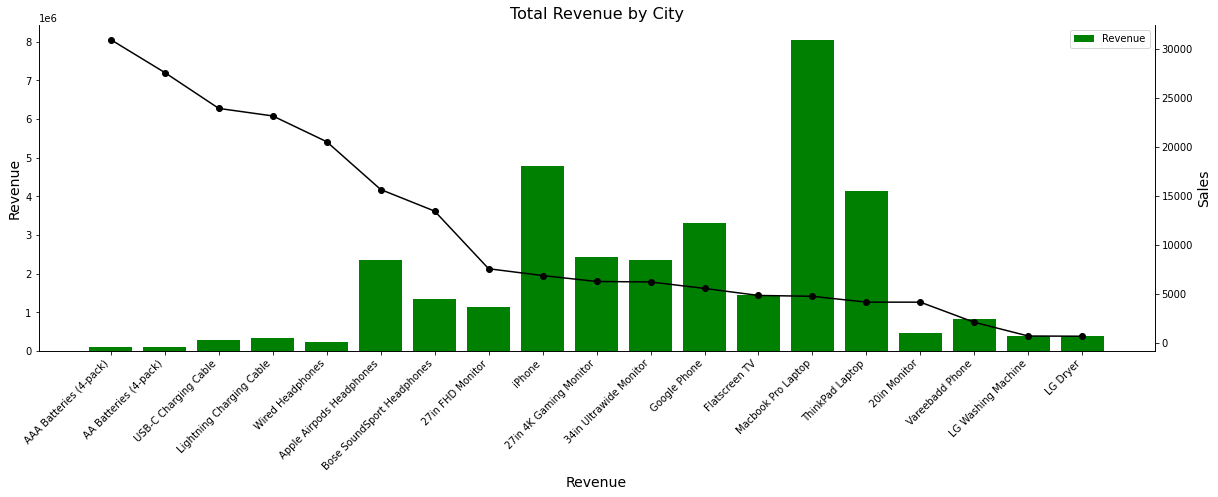

In [48]:
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(Sales_by_Products.Product, Sales_by_Products.Revenue, color='g',label='Revenue')
ax2 = ax.twinx()
ax2.plot( Sales_by_Products.Product, Sales_by_Products.Quantity, 'o-k',label='Sales')
ax.set_title('Total Revenue by City', fontsize=16)
ax.set_xlabel('Revenue', fontsize=14)
ax.set_xticklabels(Sales_by_Products.Product, rotation=45, ha='right')
ax.set_ylabel('Revenue', fontsize=14)
ax2.set_ylabel('Sales', fontsize=14)
sns.despine(left=False, right=False, bottom=False)
ax.legend()
plt.show()

C:\Users\aduno\AppData\Local\Temp\ipykernel_33596\1682154057.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



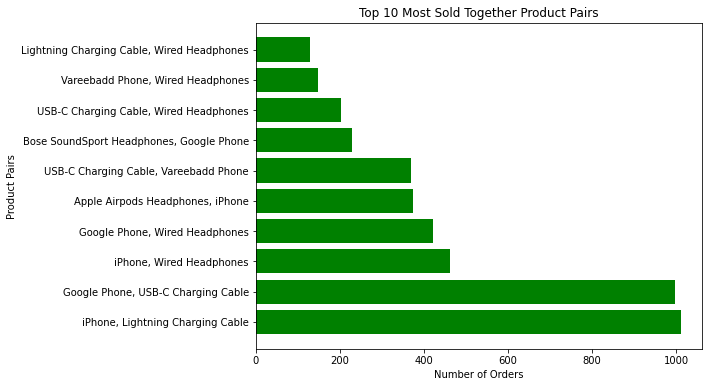

In [53]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order_ID'].duplicated(keep=False)]

# create a new column
data['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

# Create a new DataFrame with unique Order IDs and grouped products
data = data[['Order_ID', 'Grouped']].drop_duplicates()

# create a new variable for Counter
count = Counter()

# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# # and make another for loop    
# for key, value in count.most_common(10):
#     print(key, value)

# Create a bar chart of the top 10 most commonly sold together products
top_items = count.most_common(10)
item_pairs = [', '.join(pair) for pair, count in top_items]
item_counts = [count for pair, count in top_items]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(item_pairs, item_counts, color='g')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Product Pairs')
ax.set_title('Top 10 Most Sold Together Product Pairs', color='k')

plt.show()


In [159]:
def probability(product):
    try:
        if product in df['Product'].unique():
            total = len(df['Order_ID'].unique())
            frequency = df['Order_ID'][df['Product']== product].value_counts().sum()
            print(f"Probability of ordering {product}: %{frequency*100/total:.2f}")
        else:
            raise Exception
    except Exception:
        raise Exception('Enter a Valid Product')
        # sys.exit("Enter a Valid Product")
    
    

In [161]:
probability('USB-C Charging Cable')
probability('iPhone')
probability('Google Phone')
probability('Wired Headphones')

Probability of ordering USB-C Charging Cable: %12.25
Probability of ordering iPhone: %3.83
Probability of ordering Google Phone: %3.09
Probability of ordering Wired Headphones: %10.56
